<a href="https://colab.research.google.com/github/robbymugiakbar/Pengolahan-Citra/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-e39d0e428e51>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread('/content/sample_data/image.jpg')


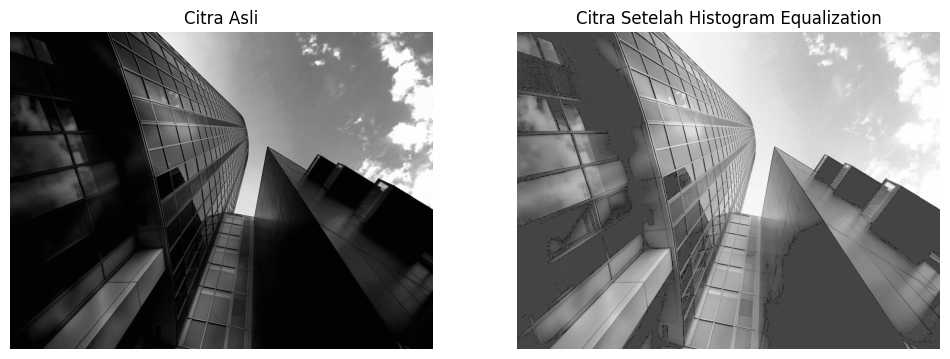

In [10]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Baca citra asli
original_image = imageio.imread('/content/sample_data/image.jpg')

# Konversi citra ke grayscale jika citra berwarna
if len(original_image.shape) == 3:
    original_image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])  # Konversi ke grayscale

# Hitung histogram citra asli
histogram, bins = np.histogram(original_image.flatten(), bins=256, range=[0, 256])

# Hitung fungsi kumulatif (CDF) dari histogram
cdf = histogram.cumsum()
cdf_normalized = cdf * histogram.max() / cdf.max()  # Normalisasi CDF

# Terapkan histogram equalization
cdf_m = np.ma.masked_equal(cdf, 0)  # Masking nilai CDF yang nol
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalisasi CDF
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')  # Mengisi nilai yang ter-mask dengan nol

# Ganti intensitas piksel pada citra asli dengan nilai dari CDF
equalized_image = cdf_final[original_image.astype('uint8')]

# Tampilkan citra asli dan citra yang telah diperbaiki
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Setelah Histogram Equalization')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()